In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
# import demographic info from all datasets

enigma=pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/data/Behaviour_Information_ALL_April7_2022.csv', header=0)
hcpaging= pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/data/HCPAGING/hcpaging_subject_info.csv', header=0)
hcpya = pd.read_csv('/Users/emilyolafson/GIT/ENIGMA/data/HCP_YA/hcp_subjinfo_age_sex.csv', header=0)

enigma.rename(columns={'BIDS_ID':'Subject', 'SEX':'sex', 'AGE':'age'},inplace=True)
hcpaging.rename(columns={'subjectid':'Subject'},inplace=True)
hcpya.rename(columns={'subjectid':'Subject'},inplace=True)

enigma_id = enigma.pop('Subject')
enigma_age = enigma.pop('age')
enigma_sex = enigma.pop('sex')

hcpaging_id = hcpaging.pop('Subject')
hcpaging_age = hcpaging.pop('age')
hcpaging_sex = hcpaging.pop('sex')

hcpya_id = hcpya.pop('Subject')
hcpya_age = hcpya.pop('age')
hcpya_sex = hcpya.pop('sex')
enigma_agesex=pd.DataFrame(data=np.transpose([enigma_id, enigma_age, enigma_sex]), columns=['Subject', 'age', 'sex'])
hcpaging_agesex=pd.DataFrame(data=np.transpose([hcpaging_id, hcpaging_age, hcpaging_sex]), columns=['Subject', 'age', 'sex'])
hcpya_agesex=pd.DataFrame(data=np.transpose([hcpya_id, hcpya_age, hcpya_sex]), columns=['Subject', 'age', 'sex'])

# import CT from all datasets

# ENIGMA
# load cortical thickness data to get headers (regions)
enigma_rh_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/aseg_aparc/aparc_rh_stats_thickness.txt', header=0)
enigma_lh_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/aseg_aparc/aparc_lh_stats_thickness.txt', header=0)
enigma_rh_thickness.rename(columns = {'rh.aparc.thickness':'Subject'},inplace=True)
enigma_lh_thickness.rename(columns = {'lh.aparc.thickness':'Subject'},inplace=True)

enigma_thickness = enigma_lh_thickness.merge(enigma_rh_thickness, on='Subject')

ids = enigma_thickness['Subject']
lst = [e[5:] for e in ids]
enigma_thickness['Subject']=lst

# HCPAGING
hcpaging_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/HCPAGING/hcpaging_aparc_thickness_stats.tsv', header=0)
ids = hcpaging_thickness['Subject']
lst = [e[:10] for e in ids]
hcpaging_thickness['Subject']=lst

# HCP YA
hcpya_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/HCP_YA/hcp_aparc_thickness_stats.tsv', header=0)

# merge age and sex columns together for plotting 
enigma_all = enigma_thickness.merge(enigma_agesex, on='Subject')
enigma_all['dataset']='ENIGMA'
hcpaging_all = hcpaging_thickness.merge(hcpaging_agesex, on='Subject')
hcpaging_all['dataset']='HCP_AGING'
hcpya_all = hcpya_thickness.merge(hcpya_agesex, on='Subject')
hcpya_all['dataset']='HCP_YA'
# merge hcpaging and hcpya
hcp_controls=pd.concat((hcpaging_all,hcpya_all), axis=0)

thickness_all = pd.concat((hcp_controls, enigma_all), axis=0)




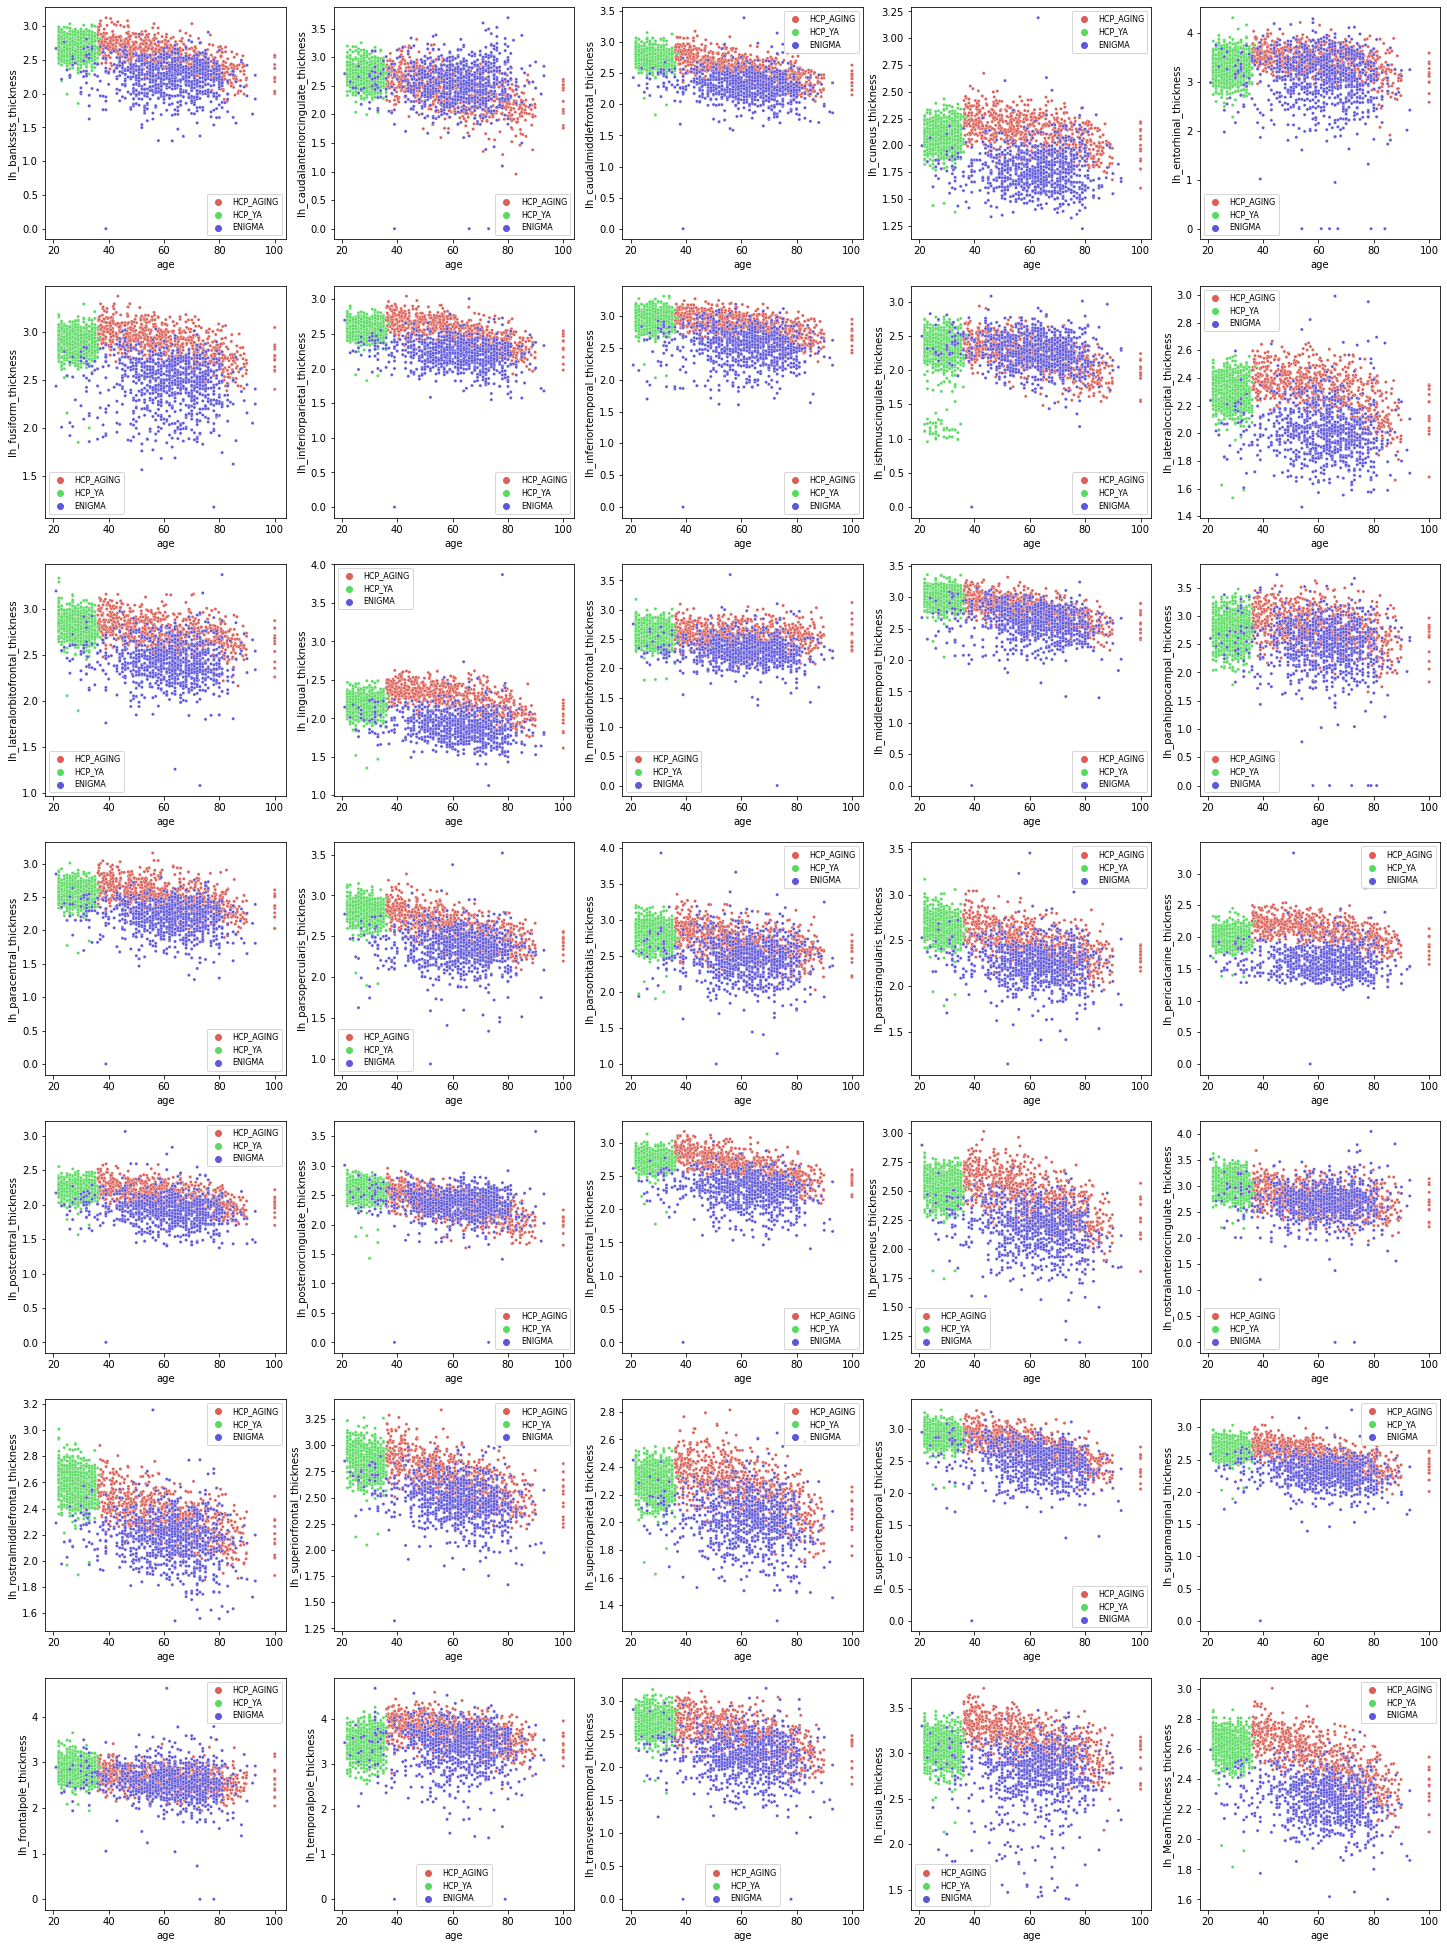

In [199]:
fig, axs = plt.subplots(ncols=5, nrows=7,figsize=(25,35))
counter =0
rowcount=0
# left hem
for i in range(1,36):
    yvar= hcp_controls.columns[i]
    sns.scatterplot(x='age', y=yvar, data=thickness_all, ax=axs[rowcount,counter%5], hue='dataset',s=10,palette="hls")

    #axs[counter].set_ylim([1.8, 3])
    #axs[counter].set_ylim([1.8, 3])
    axs[rowcount,counter%5].tick_params(axis='x', labelsize=10)
    axs[rowcount,counter%5].tick_params(axis='y', labelsize=10)
   # axs[rowcount,counter%5].get_legend().remove()
    axs[rowcount,counter%5].legend(fontsize=8)
    counter = counter +1
    if (counter%5 ==0) & (counter!=0):
        rowcount = rowcount+1
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING_ENIGMA.jpeg')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING_ENIGMA.pdf')

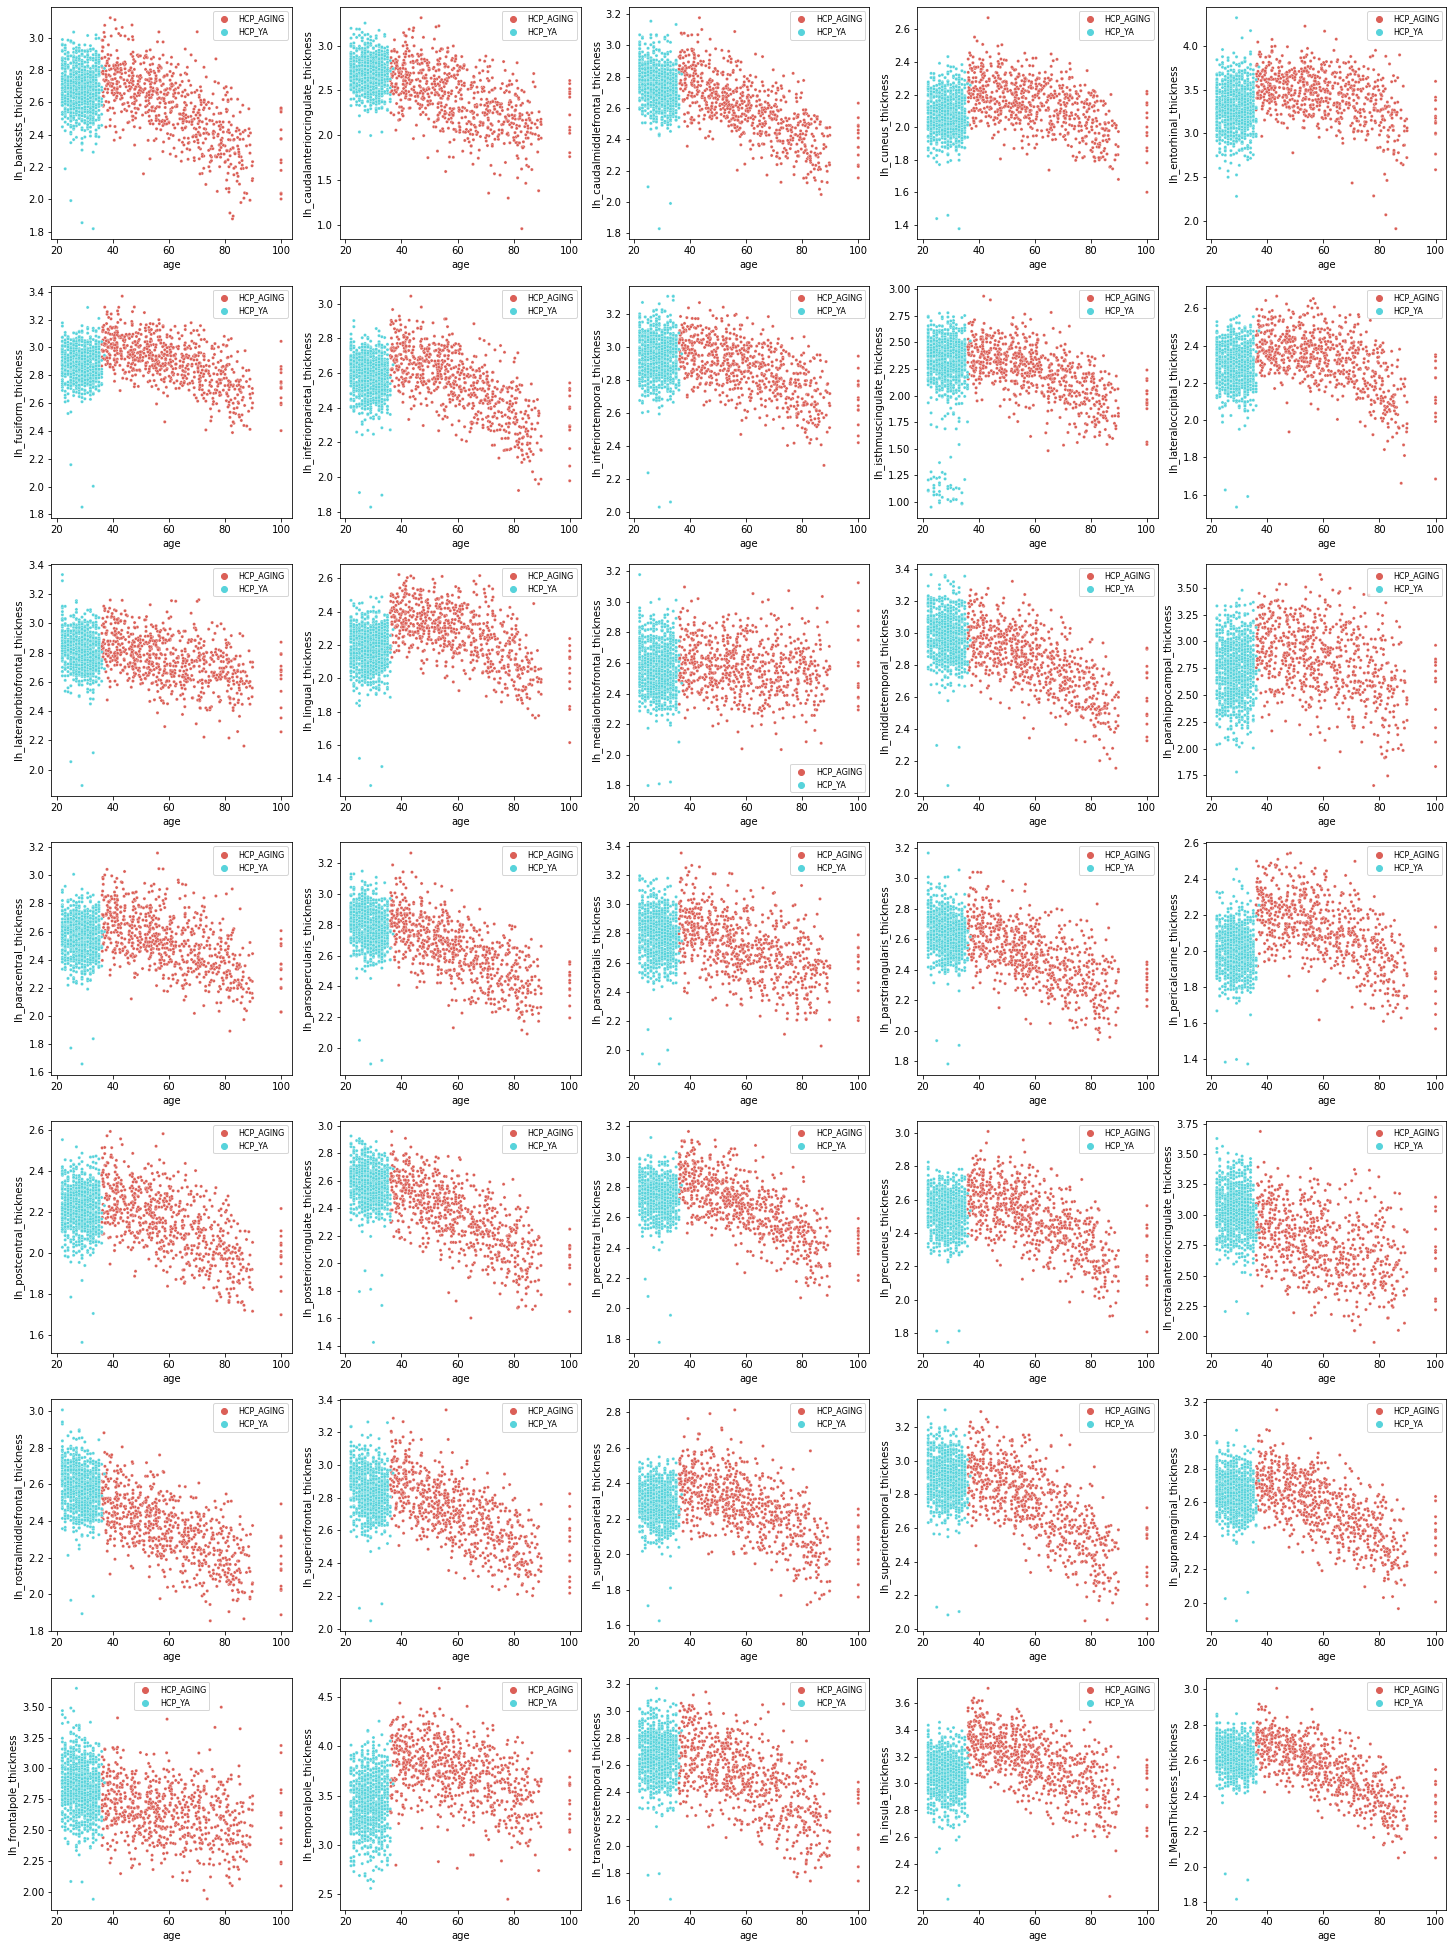

In [200]:
fig, axs = plt.subplots(ncols=5, nrows=7,figsize=(25,35))
counter =0
rowcount=0
# left hem
for i in range(1,36):
    yvar= hcp_controls.columns[i]
    sns.scatterplot(x='age', y=yvar, data=hcp_controls, ax=axs[rowcount,counter%5], hue='dataset',s=10,palette="hls")

    #axs[counter].set_ylim([1.8, 3])
    #axs[counter].set_ylim([1.8, 3])
    axs[rowcount,counter%5].tick_params(axis='x', labelsize=10)
    axs[rowcount,counter%5].tick_params(axis='y', labelsize=10)
   # axs[rowcount,counter%5].get_legend().remove()
    axs[rowcount,counter%5].legend(fontsize=8)
    counter = counter +1
    if (counter%5 ==0) & (counter!=0):
        rowcount = rowcount+1
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING.jpeg',bbox_inches='tight')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING.pdf',bbox_inches='tight')

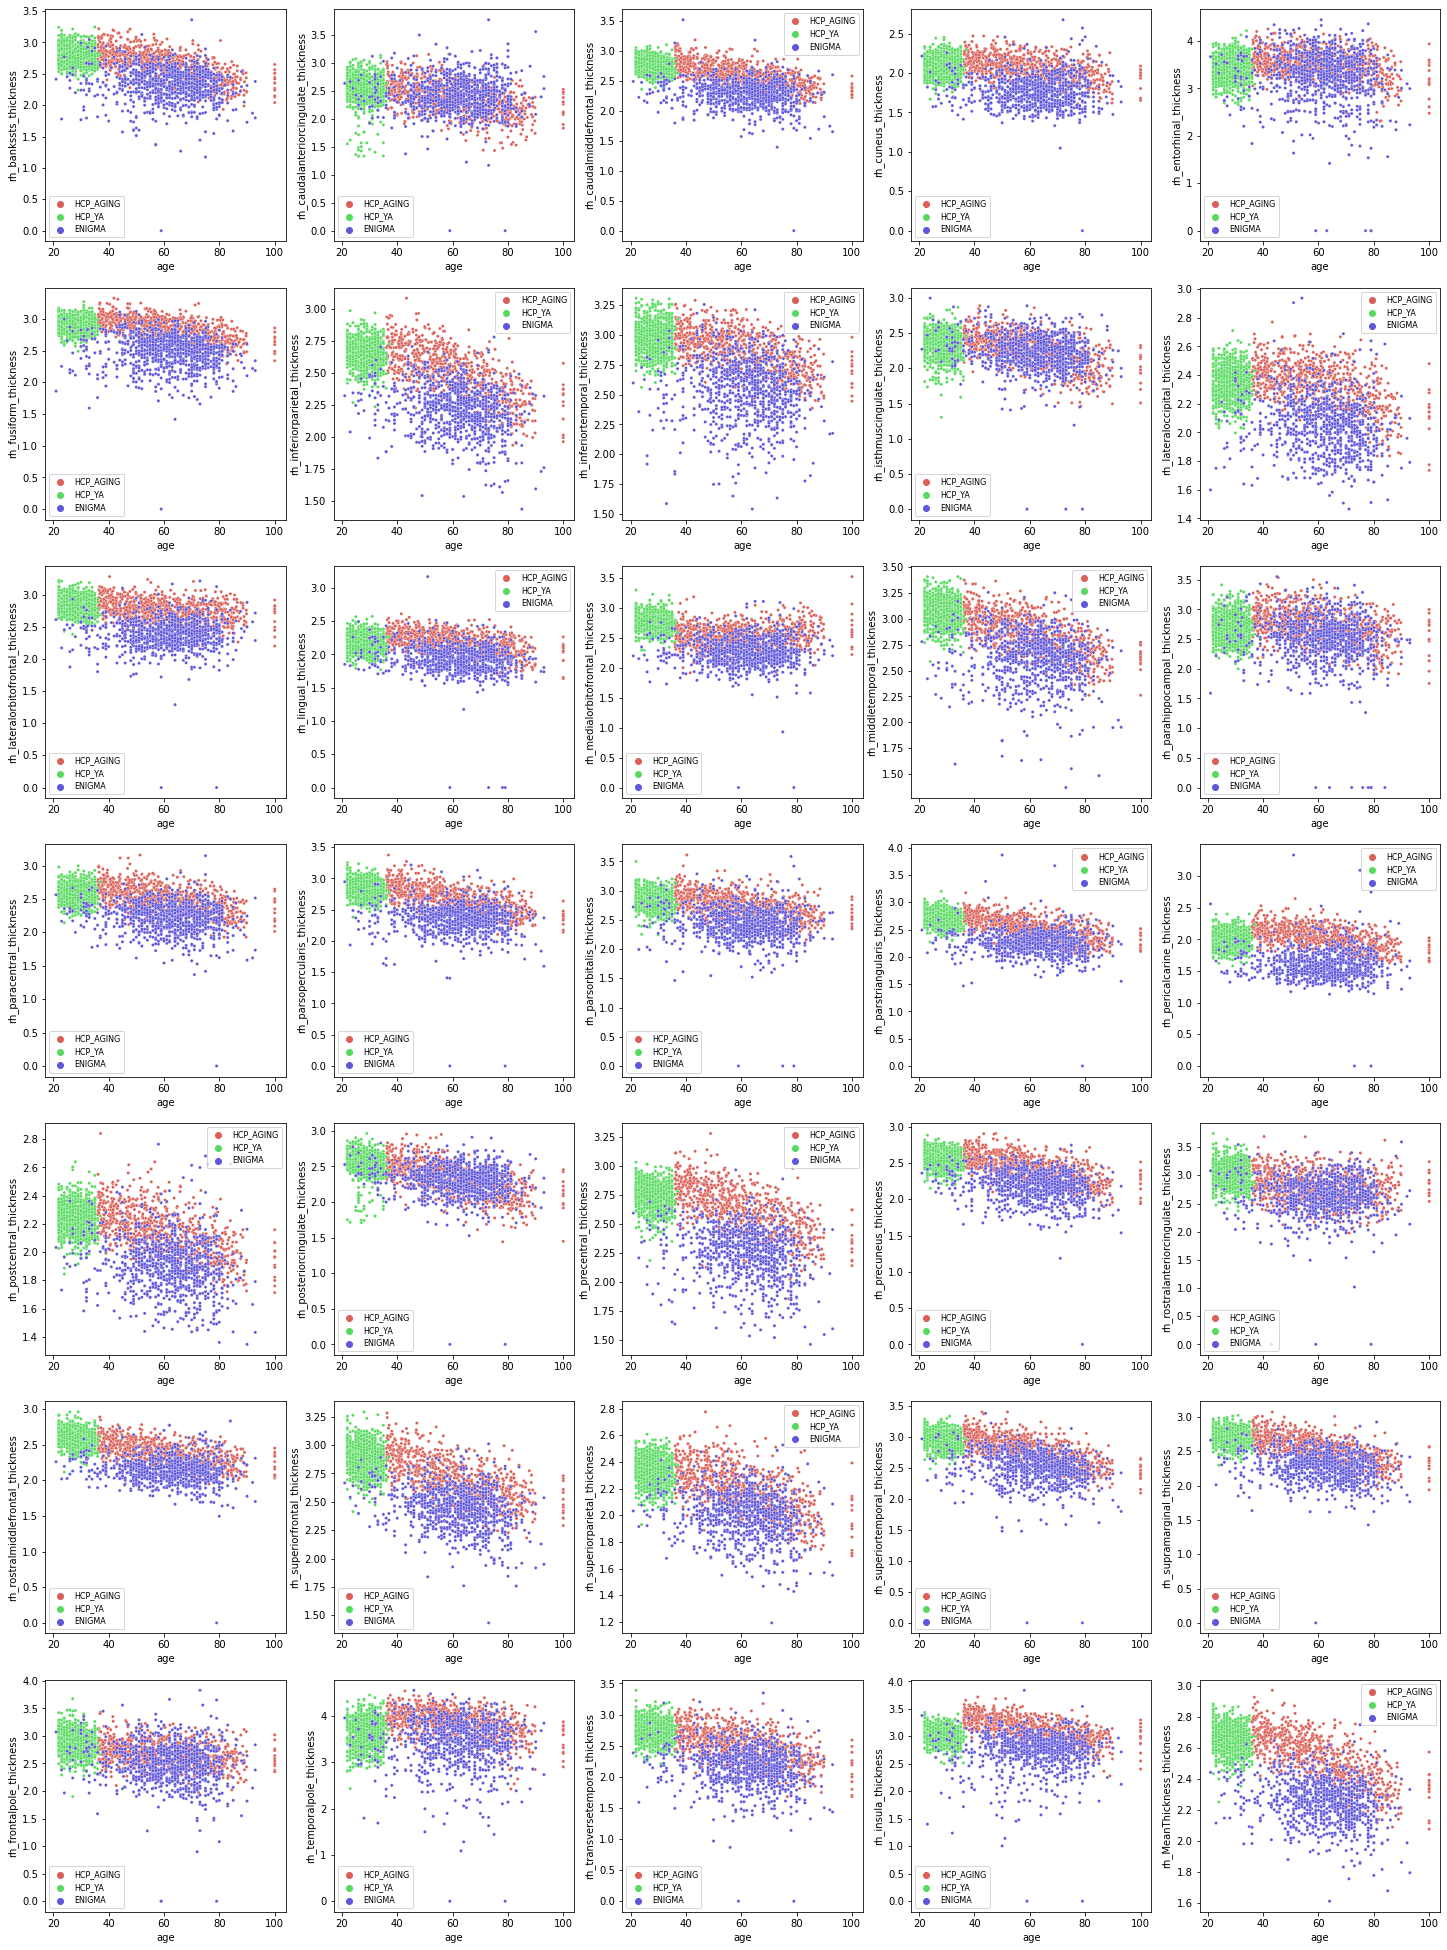

In [198]:
fig, axs = plt.subplots(ncols=5, nrows=7,figsize=(25,35))
counter =0
rowcount=0
# left hem
for i in range(36,71):
    yvar= hcp_controls.columns[i]
    sns.scatterplot(x='age', y=yvar, data=thickness_all, ax=axs[rowcount,counter%5], hue='dataset',s=10,palette="hls")
    #axs[counter].set_ylim([1.8, 3])
    #axs[counter].set_ylim([1.8, 3])
    axs[rowcount,counter%5].tick_params(axis='x', labelsize=10)
    axs[rowcount,counter%5].tick_params(axis='y', labelsize=10)
    #axs[rowcount,counter%5].get_legend().remove()
    axs[rowcount,counter%5].legend(fontsize=8)
    counter = counter +1
    if (counter%5 ==0) & (counter!=0):
        rowcount = rowcount+1
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/righthem_CT_hcp_YA_AGING_ENIGMA.pdf')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/righthem_CT_hcp_YA_AGING_ENIGMA.jpeg')

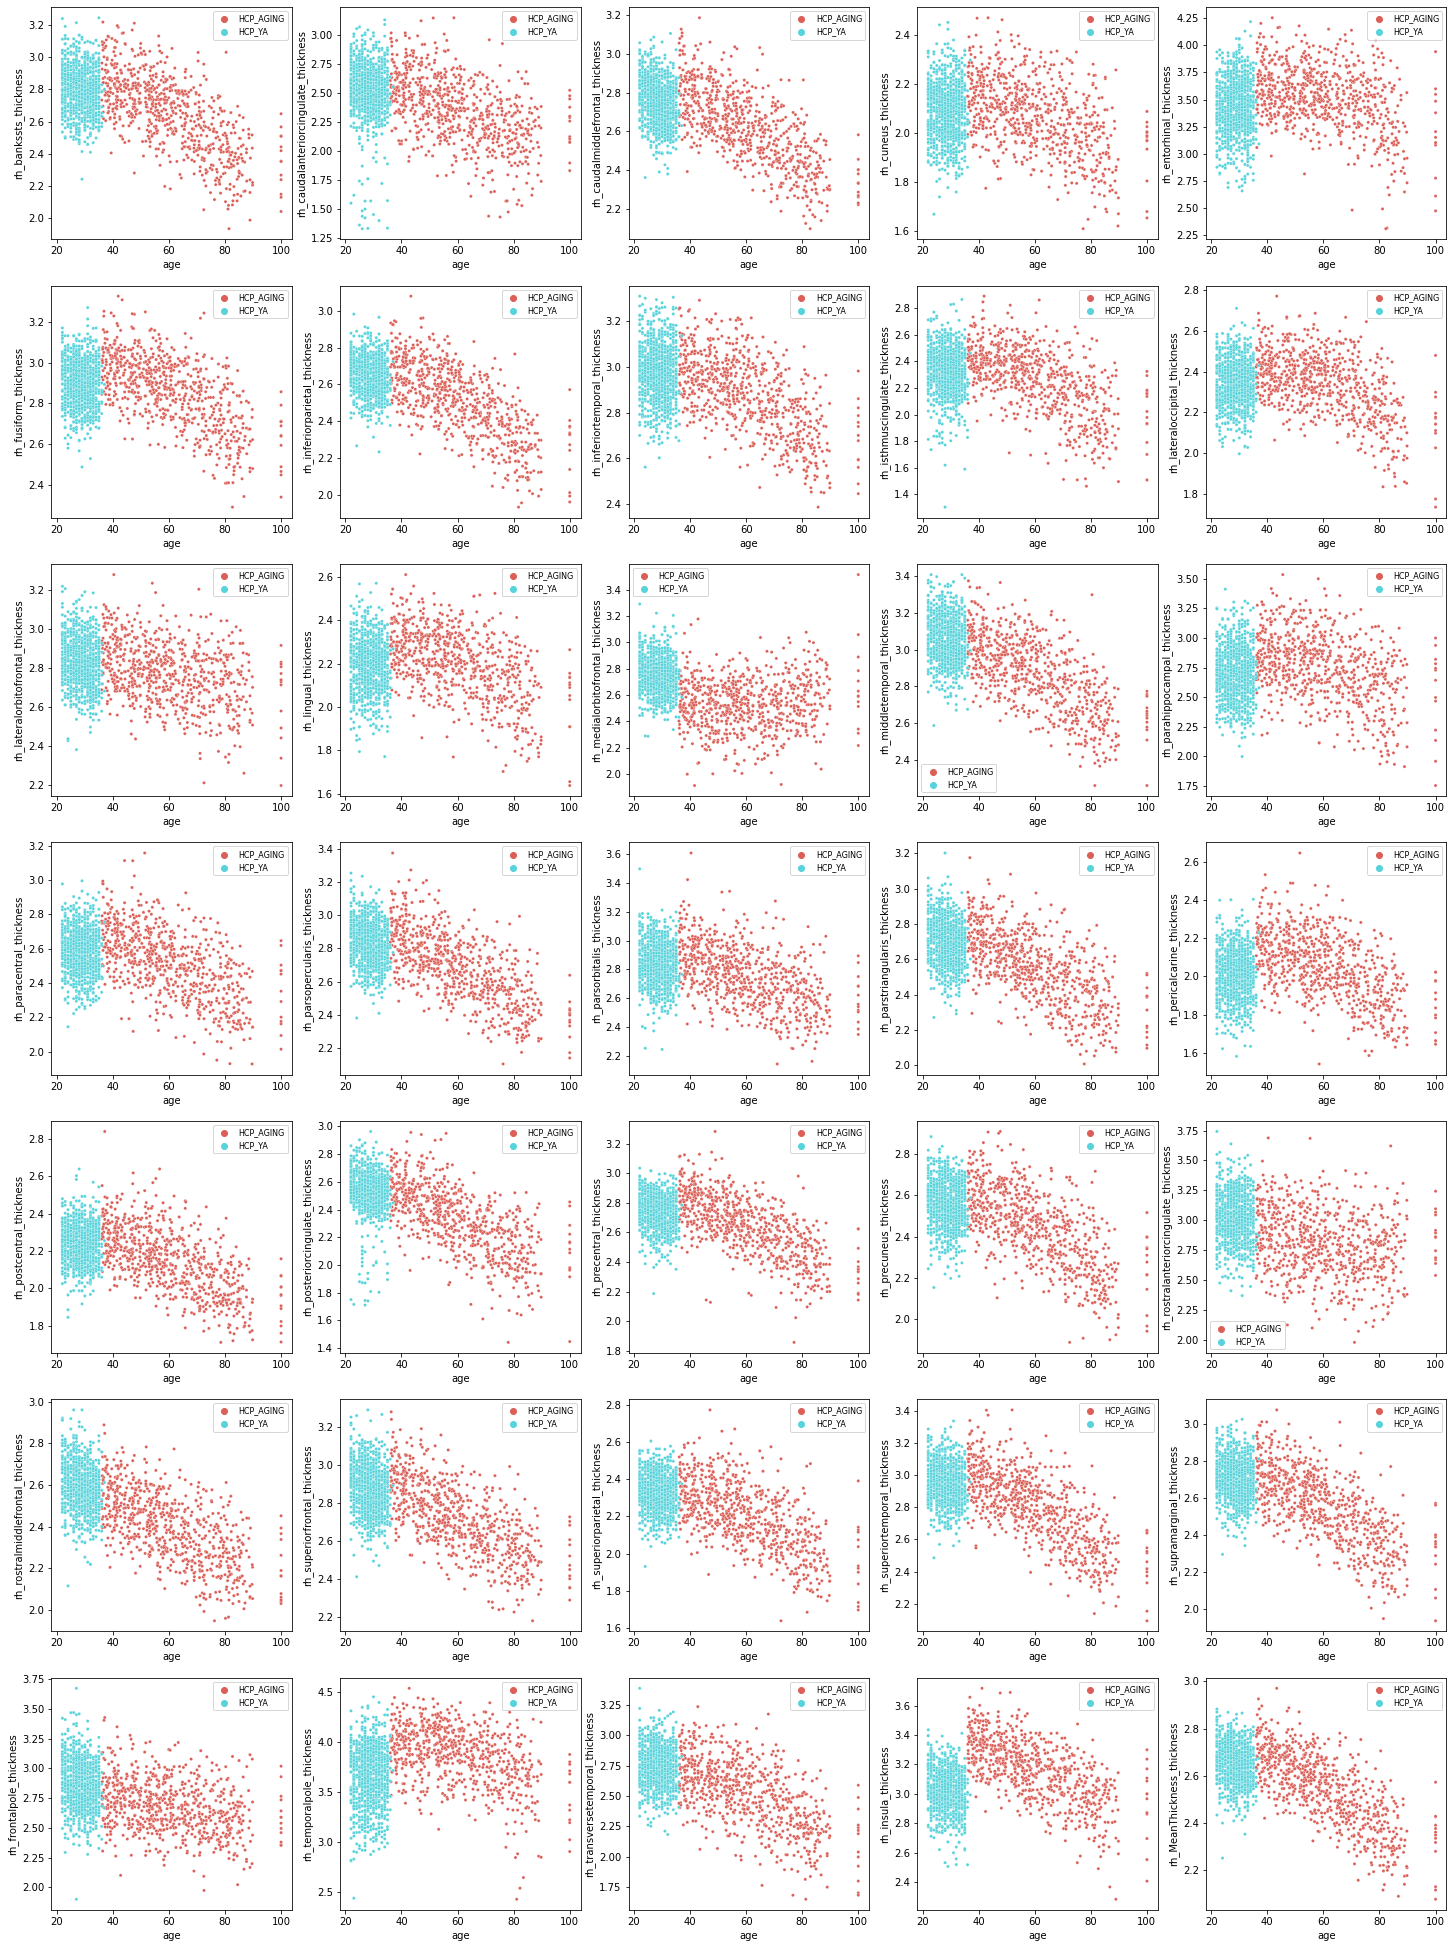

In [201]:
fig, axs = plt.subplots(ncols=5, nrows=7,figsize=(25,35))
counter =0
rowcount=0
# left hem
for i in range(36,71):
    yvar= hcp_controls.columns[i]
    sns.scatterplot(x='age', y=yvar, data=hcp_controls, ax=axs[rowcount,counter%5], hue='dataset',s=10,palette="hls")
    #axs[counter].set_ylim([1.8, 3])
    #axs[counter].set_ylim([1.8, 3])
    axs[rowcount,counter%5].tick_params(axis='x', labelsize=10)
    axs[rowcount,counter%5].tick_params(axis='y', labelsize=10)
    #axs[rowcount,counter%5].get_legend().remove()
    axs[rowcount,counter%5].legend(fontsize=8)
    counter = counter +1
    if (counter%5 ==0) & (counter!=0):
        rowcount = rowcount+1
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/righthem_CT_hcp_YA_AGING.pdf',bbox_inches='tight')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/righthem_CT_hcp_YA_AGING.jpeg',bbox_inches='tight')

In [15]:
# COMBAT
combat_thickness =  pd.read_table('/Users/emilyolafson/GIT/ENIGMA/data/FREESURFER_ENIGMA/hcp_aging_ya_thickness_datasetvar_COMBAT.csv', header=0, sep=',')
thickness_combattedcontrols = pd.concat((combat_thickness, enigma_all), axis=0)

fig, axs = plt.subplots(ncols=5, nrows=7,figsize=(25,35))
counter =0
rowcount=0
# left hem
for i in range(3,38):
    yvar= combat_thickness.columns[i]
    sns.scatterplot(x='age', y=yvar, data=combat_thickness, ax=axs[rowcount,counter%5], hue='dataset',s=10,palette="Set2")

    #axs[counter].set_ylim([1.8, 3])
    #axs[counter].set_ylim([1.8, 3])
    axs[rowcount,counter%5].tick_params(axis='x', labelsize=10)
    axs[rowcount,counter%5].tick_params(axis='y', labelsize=10)
   # axs[rowcount,counter%5].get_legend().remove()
    axs[rowcount,counter%5].legend(fontsize=8)
    counter = counter +1
    if (counter%5 ==0) & (counter!=0):
        rowcount = rowcount+1
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING_COMBAT.jpeg')
plt.savefig('/Users/emilyolafson/GIT/ENIGMA/enigma_disconnections/cortical_atrophy/lefthem_CT_hcp_YA_AGING_COMBAT.pdf')